<a href="https://colab.research.google.com/github/sgorav1/Helloworld/blob/main/Copy_of_NasscomAIFC_Project_62_Question_Copy_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 16: House Price Prediction 

---

### Context

The price of the house depends on various factors like locality, connectivity, number of rooms, etc. Change in the mindset of the millennial generation also contributes to ups and down in house prices as the young generation is much into renting than to owe a house. Predicting the right price of the house is important for investors in the real estate business. This makes it very important to come up with proper and smart technique to estimate the true price of the house. 
 

---

#### Getting Started

Follow the steps described below to solve the project:

1. Click on the link provided below to open the Colab file for this project.
   
   https://colab.research.google.com/drive/1A8Ui9xG_ilL23kUKPj3Nd_XSyF-OBewR

2. Create the duplicate copy of the Colab file. Here are the steps to create the duplicate copy:

    - Click on the **File** menu. A new drop-down list will appear.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/0_file_menu.png' width=500>

    - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/1_create_colab_duplicate_copy.png' width=500>

     - After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_CapstoneProject17** format. 

3. Now, write your code in the prescribed code cells.

---

### Problem Statement


You are willing to sell your house. You are not sure about the price of your house and want to estimate its price. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your house for selling it. 

---

### Data Description

The **housing** dataset contains the prices and other attributes. There are $545$ rows and $12$ attributes (features) with a target column (price). 

Following are the features:  

|Column|Description|
|---:|:---|
|`Price`|Price in INR|
|`area`|Area in square ft.|
|`bedrooms`|Number of bedrooms in the house|
|`bathrooms`|Number of bathrooms in the house|
|`stories`|Number of stores in the house|
|`mainroad`|Whether house is on main road or not(binary)|
|`guestroom`|Whether house have guestroom or not(binary)|
|`basement`|Whether house have basement or not(binary)|
|`airconditioning`|Whether house have airconditioning or not(binary)|
|`hotwaterheating`|Whether house have hotwaterheating or not(binary)|
|`parking`|Number of parking area|
|`prefarea`|Whether house have prefarea or not(binary)|
|`furnishingstatus`|Furnish status of the house|


  **Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv


---

### Things To Do

1. Explore the Housing dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes using feature encoding.

3. Build a linear regression model by selecting the most relevant features to predict the price of houses.

4. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

**Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv








In [ ]:
# Import the required modules and load the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Check if there are any NULL values.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.


In [ ]:
# Check categorical attributes
df.select_dtypes(include=['object']).dtypes

mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
prefarea            object
furnishingstatus    object
dtype: object

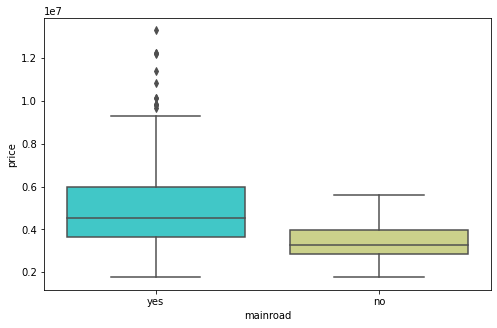

In [ ]:
# Boxplot for 'mainroad' vs 'price'
plt.figure(figsize=(8,5))
sns.boxplot(x='mainroad',y='price',data=df, palette='rainbow')

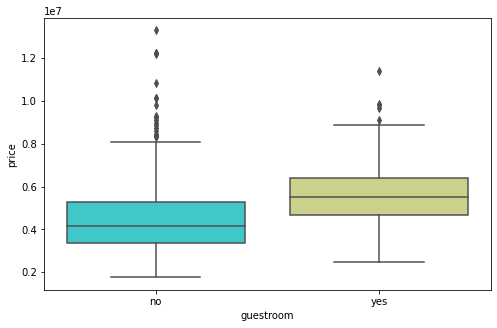

In [ ]:
# Boxplot for 'guestroom' vs 'price'
plt.figure(figsize=(8,5))
sns.boxplot(x='guestroom',y='price',data=df, palette='rainbow')


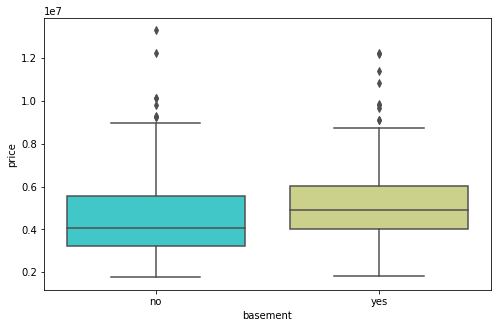

In [ ]:
# Boxplot for 'basement' vs 'price'
plt.figure(figsize=(8,5))
sns.boxplot(x='basement',y='price',data=df, palette='rainbow')

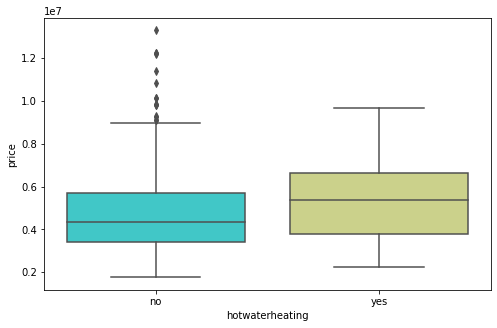

In [ ]:
# Boxplot for 'hotwaterheating' vs 'price'
plt.figure(figsize=(8,5))
sns.boxplot(x='hotwaterheating',y='price',data=df, palette='rainbow')

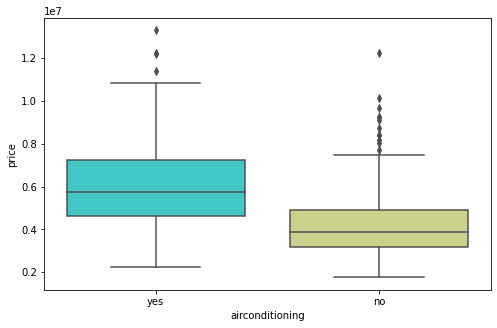

In [ ]:
# Boxplot for 'airconditioning' vs 'price'
plt.figure(figsize=(8,5))
sns.boxplot(x='airconditioning',y='price',data=df, palette='rainbow')


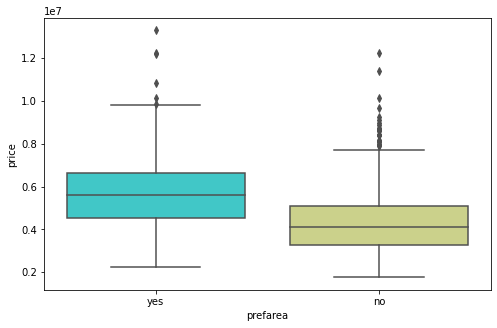

In [ ]:
# Boxplot for 'prefarea' vs 'price'
plt.figure(figsize=(8,5))
sns.boxplot(x='prefarea',y='price',data=df, palette='rainbow')


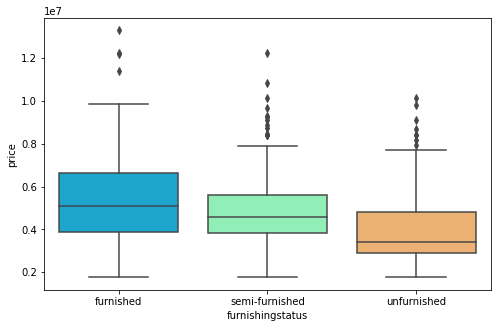

In [ ]:
# Boxplot for 'furnishingstatus' vs 'price'
plt.figure(figsize=(8,5))
sns.boxplot(x='furnishingstatus',y='price',data=df, palette='rainbow')

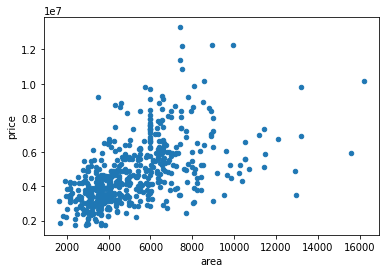

In [ ]:
# Create scatter plot with 'area' on X-axis and 'price' on Y-axis
df.plot.scatter(x = 'area', y = 'price')


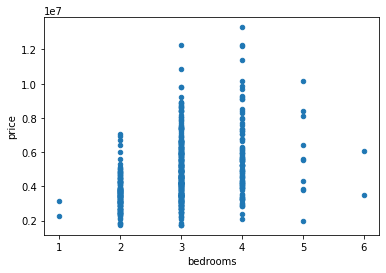

In [ ]:
# Create scatter plot with 'bedrooms' on X-axis and 'price' on Y-axis
df.plot.scatter(x = 'bedrooms', y = 'price')

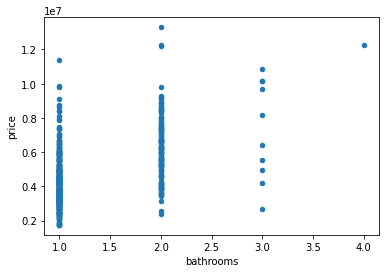

In [ ]:
# Create scatter plot with 'bathrooms' on X-axis and 'price' on Y-axis
df.plot.scatter(x = 'bathrooms', y = 'price')

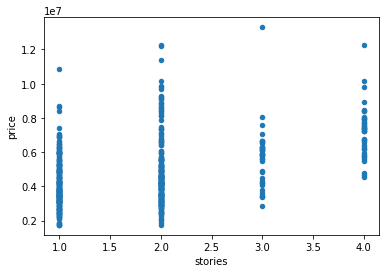

In [ ]:
# Create scatter plot with 'stories' on X-axis and 'price' on Y-axis
df.plot.scatter(x = 'stories', y = 'price')

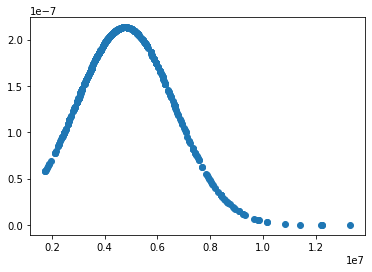

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
mean = statistics.mean(df["price"])
sd = statistics.stdev(df["price"])
# Create a probablity density function for plotting the normal distribution

plt.scatter(df["price"], norm.pdf(df['price'], mean, sd))
plt.show()


---

#### 3. Feature encoding 

Perform feature encoding using `map()` function and one-hot encoding.

In [ ]:
# Replace yes with 1 and no with 0 for all the values in features 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' using map() function.
words=pd.Series(["yes","no"])
words_dict = {
    "yes" : 1,
    "no" : 0
}
words = words.map(words_dict)
words

0    1
1    0
dtype: int64

In [ ]:
def num_map(series):
  return series.map(words_dict)

df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].apply(num_map,axis=1)

In [ ]:
# Print dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Perform one hot encoding for furnishingstatus feature.


In [ ]:
# Drop 'furnishingstatus' feature
df = df.drop(columns="furnishingstatus")

In [ ]:
# Print dataframe 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


---

#### 4. Model Building and Evaluation 

Build a multiple linear regression model using the `statsmodels.api` module.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
features=list(df.columns)
features.remove('price')
from sklearn.model_selection import train_test_split
X=df[features]
y=df['price']

# Split the DataFrame into the train and test sets such that test set has 33% of the values.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 42)


In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
features = list(df.columns)
features.remove('price')

X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']

In [ ]:
# Build a linear regression model using all the features to predict prices.
def standard_norm(series):
  series_mean = series.mean()
  series_std = series.std()
  new_series = (series - series_mean) / series_std
  return new_series

X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_test[X_test.columns[:16]] = X_test[X_test.columns[:16]].apply(standard_norm, axis = 0)

#  Build a linear regression model using all the features to predict car prices.
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()

print(lin_reg.summary())


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     73.40
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           7.52e-86
Time:                        22:44:57   Log-Likelihood:                -5801.5
No. Observations:                 381   AIC:                         1.163e+04
Df Residuals:                     369   BIC:                         1.167e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.762e+06   5.17e+04     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Q:** What is the Adjusted $R^2$ value?

**A:** 


---

#### 5. Model Evaluation

Build a multiple linear regression model  using `sklearn` module. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.

In [ ]:
# Build multiple linear regression model using all the features
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(X_train,y_train)

# Build linear regression model using the 'sklearn.linear_model' module.


# Print the value of the intercept
print(lr1.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.
for i in list(zip(features,lr1.coef_)):
  print(i)


4762406.272965879
('area', 557801.0971595175)
('bedrooms', 65762.70755361393)
('bathrooms', 534674.6287691467)
('stories', 375722.28737890767)
('mainroad', 155328.17722808145)
('guestroom', 115744.0440111268)
('basement', 249440.73952488104)
('hotwaterheating', 145729.40801479694)
('airconditioning', 326745.59595352196)
('parking', 267408.4846667254)
('prefarea', 219768.69725220185)


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred=lr1.predict(X_train)
print(f'train dataset: \n r squared :{r2_score(y_train_pred,y_train)}\n mean squared error: {mean_squared_error(y_train_pred,y_train)}\n mean absolute error:{mean_absolute_error(y_train_pred,y_train)}')

y_test_pred=lr1.predict(X_test)
print(f'test dataset: \n r squared :{r2_score(y_test_pred,y_test)}\n mean squared error: {mean_squared_error(y_test_pred,y_test)}\n mean absolute error:{mean_absolute_error(y_test_pred,y_test)}')


train dataset: 
 r squared :0.5429673615392796
 mean squared error: 985425965099.9915
 mean absolute error:734379.7250233465
test dataset: 
 r squared :0.33330283010734985
 mean squared error: 1544079092962.2998
 mean absolute error:900518.0503438999


**Q:** What is the $R^2$ value for train set and test set?

**A:** 

---

#### 6. Recursive Feature Elimination

Find out the best features out of all features using RFE and evaluate the model again.

In [ ]:
# Create a Python dictionary storing the moderately to highly correlated features with price and the corresponding correlation values.
# Keep correlation threshold to be 0.2
major_features = {}
for f in features:
  corr_coef = np.corrcoef(df['price'], df[f])[0, 1]
  if (corr_coef >= 0.2) or (corr_coef <= -0.2):
    major_features[f] = corr_coef

print("Number of features moderately to highly correlated with price =", len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 9 



{'airconditioning': 0.4529540842560478,
 'area': 0.5359973457780796,
 'bathrooms': 0.517545339455011,
 'bedrooms': 0.3664940257738689,
 'guestroom': 0.2555172899349996,
 'mainroad': 0.2968984892639764,
 'parking': 0.3843936486357259,
 'prefarea': 0.32977704986810735,
 'stories': 0.4207123661886163}

In [ ]:
# Perform RFE and select best 7 features  
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 10 features.
skl_lin_reg = LinearRegression()
rfe1 = RFE(skl_lin_reg,n_features_to_select=10)

# Fit with 10 features.
rfe1.fit(X_train[major_features.keys()], y_train)

# Print the attributes.
print(major_features.keys(), "\n") # List of features out of which 10 best featuers are to be selected by RFE.
print(rfe1.support_, "\n") # Array containing the boolean values      
print(rfe1.ranking_, "\n")


dict_keys(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea']) 

[ True  True  True  True  True  True  True  True  True] 

[1 1 1 1 1 1 1 1 1] 



In [ ]:
import statsmodels.api as sm  

# Subset the train set such that it contains only the above 10 selected features.
rfe_features = X_train[major_features.keys()].columns[rfe1.support_]
X_train_rfe1 = X_train[rfe_features]

# Add the 'const' column to the features set.
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fit the model with 10 features selected by RFE.
sm_lin_reg1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(sm_lin_reg1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     81.98
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           1.19e-82
Time:                        22:54:09   Log-Likelihood:                -5813.8
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     371   BIC:                         1.169e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.762e+06   5.32e+04     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
import statsmodels.api as sm
skl_lin_reg2 = LinearRegression()
rfe2 = RFE(skl_lin_reg2,n_features_to_select=5)

# Fit with 5 features.
rfe2.fit(X_train[major_features.keys()], y_train)

# Subset the train set such that it contains only the above 5 selected features.
rfe_features = X_train[major_features.keys()].columns[rfe2.support_]
X_train_rfe2 = X_train[rfe_features]

# Add the 'const' column to the features set.
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fit the model with 5 features.
sm_lin_reg2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(sm_lin_reg2.summary())
X_train_final = X_train_rfe2.drop(columns="const")
lin_reg_final = LinearRegression().fit(X_train_final,y_train)
y_train_pred = lin_reg_final.predict(X_train_final)
y_train_pred[:10]
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error
train_r2_score = r2_score(y_train,y_train_pred)
train_r2_adjusted = 1 - (1-train_r2_score)*(X_train_final.shape[0]-1)/(X_train_final.shape[0]-X_train_final.shape[1]-1)
print(train_r2_score)
print(train_r2_adjusted)
train_mse = mean_squared_error(y_train_pred,y_train)
train_abs = mean_absolute_error(y_train,y_train_pred)

print(train_mse)
print(train_abs)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           9.39e-77
Time:                        22:56:13   Log-Likelihood:                -5837.6
No. Observations:                 381   AIC:                         1.169e+04
Df Residuals:                     375   BIC:                         1.171e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.762e+06   5.63e+04     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


---

#### 7. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not. For this, plot the  histogram of the residuals.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


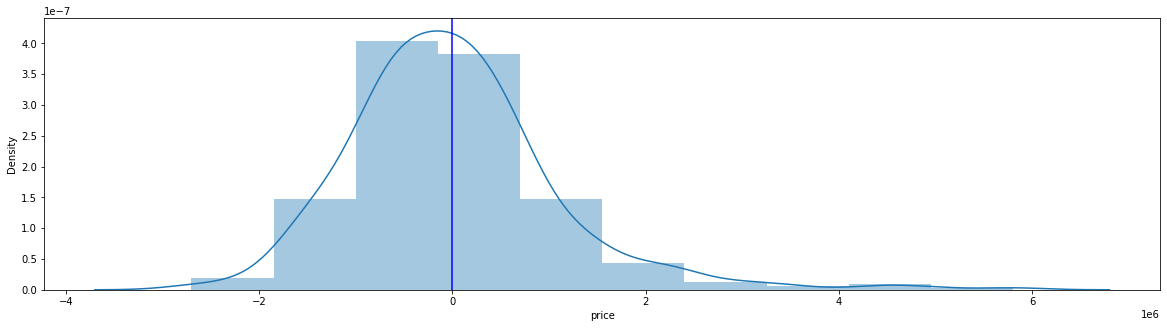

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.
train_residuals = y_train - y_train_pred
plt.figure(figsize=(20,5))
sns.distplot(train_residuals,bins="sturges")
plt.axvline(x=np.mean(train_residuals),color="blue")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


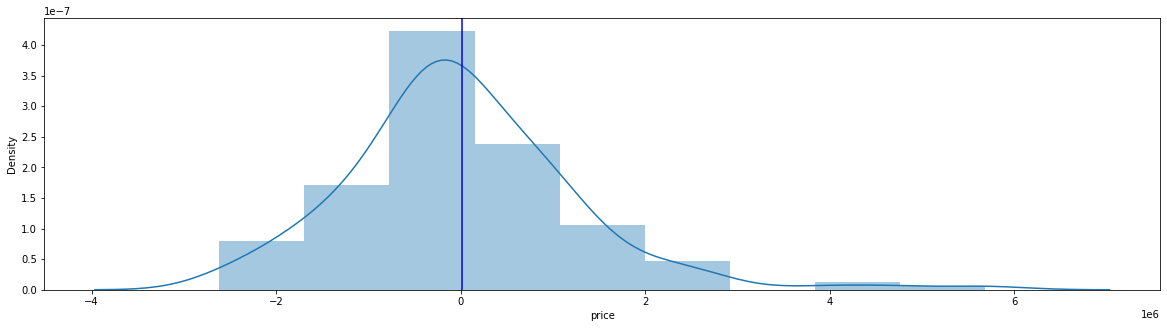

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.
train_residuals_tr = y_test - y_test_pred
plt.figure(figsize=(20,5))
sns.distplot(train_residuals_tr,bins="sturges")
plt.axvline(x=np.mean(train_residuals_tr),color="blue")
plt.show()

---

#### 8. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

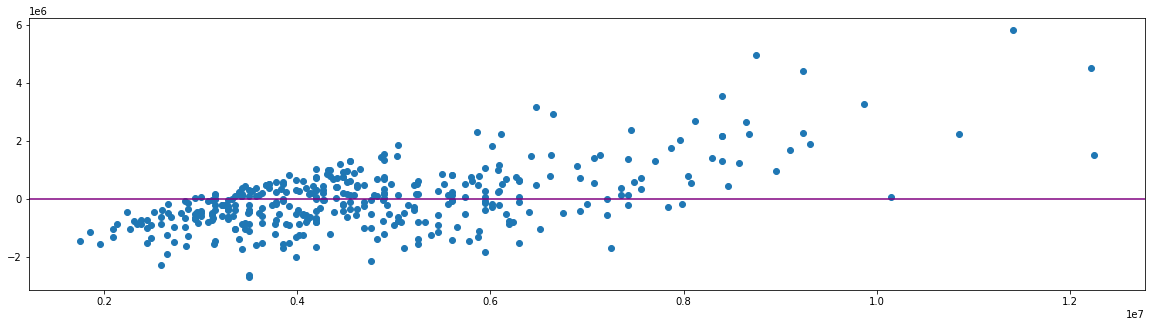

In [ ]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(20,5))
plt.scatter(y_train,train_residuals)
plt.axhline(y = train_residuals.mean(),color="purple")
plt.show()

In [ ]:
train_residuals.shape

(164,)

---

### Submitting the Project

Follow the steps described below to submit the project.

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>


3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_CapstoneProject17**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_CapstoneProject17** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>


---